In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

# Wie haben sich die Ausleihzahlen von EBOOKs im Vergleich zu BOOKs in den letzten zehn Jahren entwickelt?

## Step 1: Retrieve the datasets

In [2]:
# range(n, n-1) erzeugt eine sequenz von n bis n-1
# str() notwendig für concat von integer mit string, da datentypen angeglichen werden müssen
for i in range(2011,2021):
    url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=" + str(i) + "&$limit=10000"
    print("Retrieving: \t" + url)
    
    checkout_file = "checkout_" + str(i) + ".csv"
    print("Writing: \t" + checkout_file)
    
    urllib.request.urlretrieve(url, checkout_file)
    print("Done\n")

Retrieving: 	https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2011&$limit=10000
Writing: 	checkout_2011.csv
Done

Retrieving: 	https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2012&$limit=10000
Writing: 	checkout_2012.csv
Done

Retrieving: 	https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2013&$limit=10000
Writing: 	checkout_2013.csv
Done

Retrieving: 	https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2014&$limit=10000
Writing: 	checkout_2014.csv
Done

Retrieving: 	https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2015&$limit=10000
Writing: 	checkout_2015.csv
Done

Retrieving: 	https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2016&$limit=10000
Writing: 	checkout_2016.csv
Done

Retrieving: 	https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2017&$limit=10000
Writing: 	checkout_2017.csv
Done

Retrieving: 	https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=c

## Step 2: Transform into dataframe

In [3]:
# leeren Dataframe erzeugen
checkouts_df = pd.DataFrame()

# gehe über alle Datasets und vereine sie in ein großes Dataframe
for i in range(2011,2021):
    checkout_file = "checkout_" + str(i) + ".csv"
    
    # temporäres Dataframe aus Dataset erzeugen
    print("Generating dataframe for: \t" + checkout_file)
    temp_df = pd.read_csv(checkout_file)
    
    
    # jedes temporäre Dataframe wird an das Gesamt-Dataframe drangehängt
    print("Add " + str(len(temp_df)) + " rows to aggregated dataframe")
    checkouts_df = pd.concat([checkouts_df,temp_df])
    
    print("Done\n")
    
print("Aggregated Dataframe has " + str(len(checkouts_df)) + " rows")

Generating dataframe for: 	checkout_2011.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2012.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2013.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2014.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2015.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2016.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2017.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2018.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2019.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2020.csv
Add 10000 rows to aggregated dataframe
Done

Aggregated Dataframe has 100000 rows


In [4]:
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,SOUNDDISC,2011,1,1,Rosenkavalier,NaN,NaN,NaN,NaN
1,Digital,Freegal,SONG,2011,7,1,Close Enough To Perfect,Alabama,NaN,NaN,NaN
2,Physical,Horizon,BOOK,2011,6,1,Set in stone,NaN,"Family problems Fiction, Secrets Fiction, Iden...",NaN,NaN
3,Digital,Freegal,SONG,2011,1,1,Your Love (Acoustic),The Outfield,NaN,NaN,NaN
4,Physical,Horizon,SOUNDDISC,2011,1,1,Last date,NaN,Jazz 1961 1970,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,BOOK,2020,1,1,A rebel heart / Beth White.,"White, Beth, 1957-","Man woman relationships Fiction, Women plantat...","Revell, a division of Baker Publishing Group,",[2018]
9996,Physical,Horizon,BOOK,2020,1,1,Discover Scotland / this edition written and r...,"Wilson, Neil, 1959-",Scotland Guidebooks,"Lonely Planet,",2013.
9997,Physical,Horizon,BOOK,2020,1,1,The wolves / Alex Berenson.,"Berenson, Alex","Wells John Fictitious character Fiction, Unite...","G.P. Putnam's Sons,",[2016]
9998,Digital,OverDrive,AUDIOBOOK,2020,1,2,The Healing Code: 6 Minutes to Heal the Source...,Alexander Loyd,"Medical, New Age, Nonfiction",Hachette Audio,2011


## Step 3: Visualize

<AxesSubplot:xlabel='checkoutyear'>

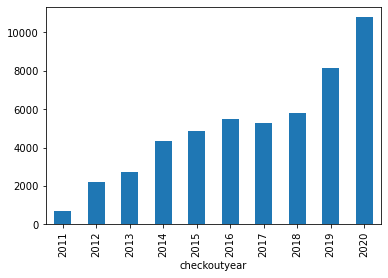

In [5]:
checkouts_ebook_df = checkouts_df[checkouts_df["materialtype"] == "EBOOK"]
checkouts_ebook_final_df = checkouts_ebook_df.groupby(by="checkoutyear").sum()
checkouts_ebook_final_df["checkouts"].plot(kind="bar")

<AxesSubplot:xlabel='checkoutyear'>

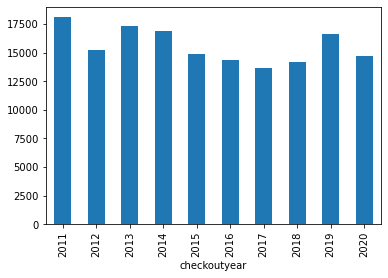

In [6]:
checkouts_ebook_df = checkouts_df[checkouts_df["materialtype"] == "BOOK"]
checkouts_ebook_final_df = checkouts_ebook_df.groupby(by="checkoutyear").sum()
checkouts_ebook_final_df["checkouts"].plot(kind="bar")

## Extra-Step 4: Lets look at all materialtypes at once ;-)

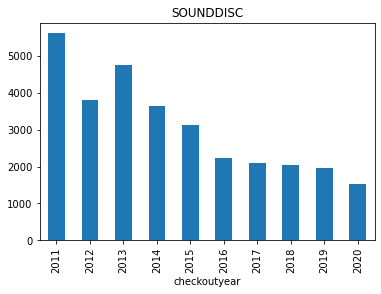

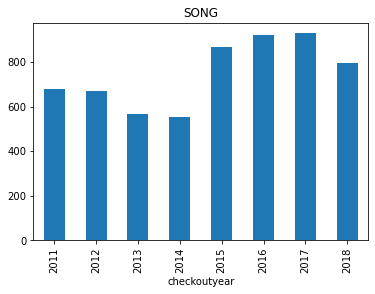

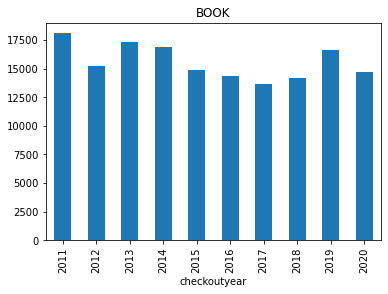

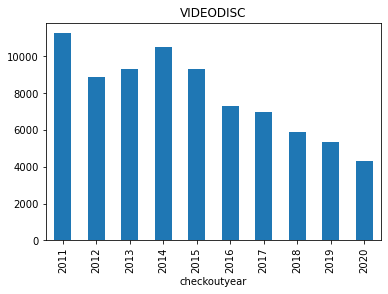

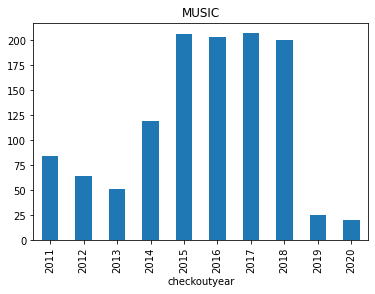

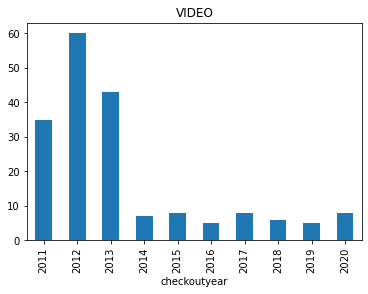

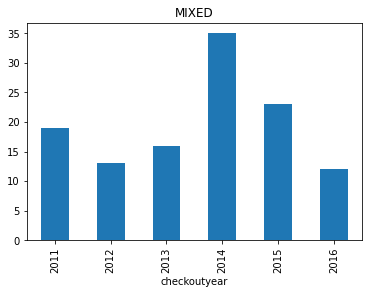

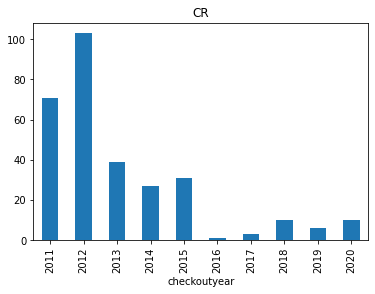

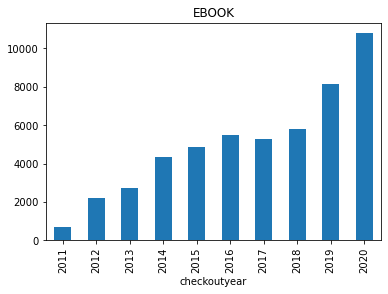

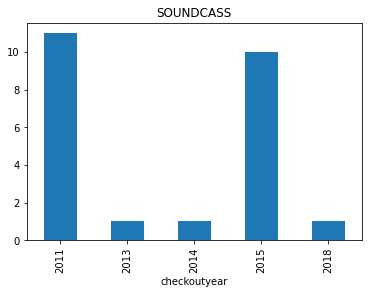

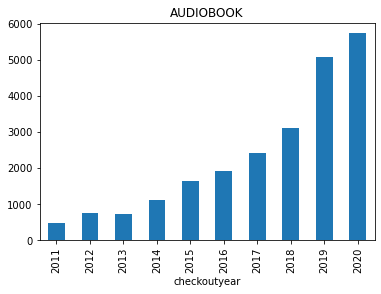

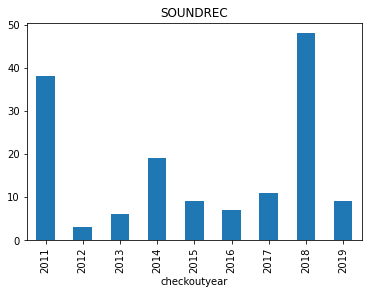

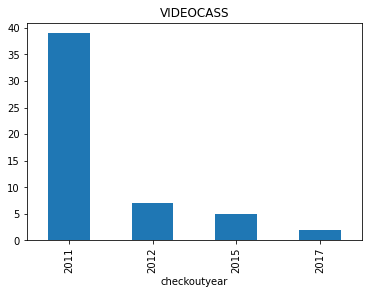

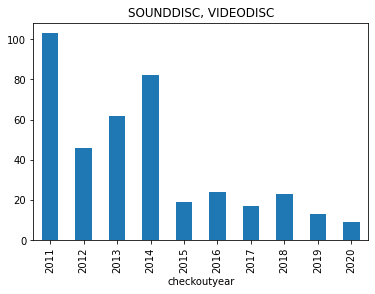

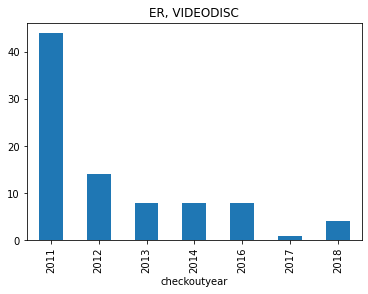

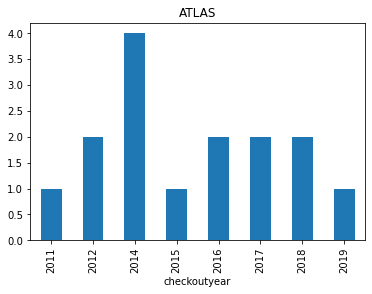

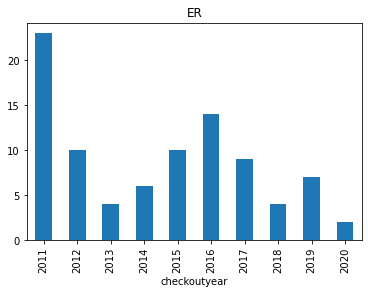

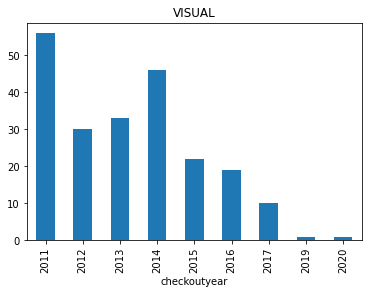

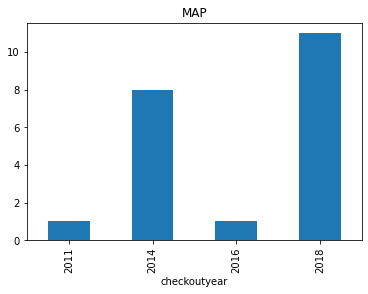

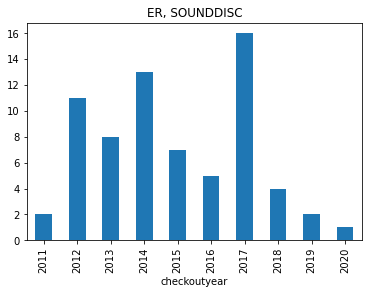

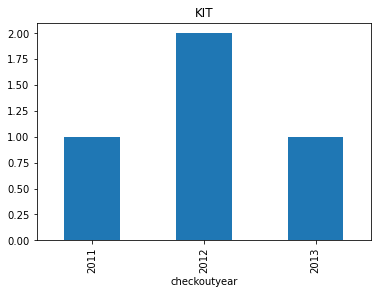

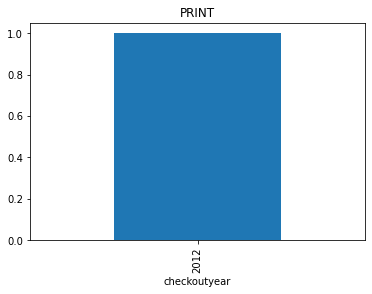

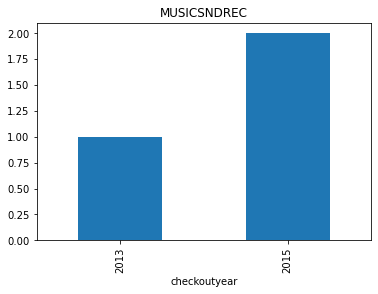

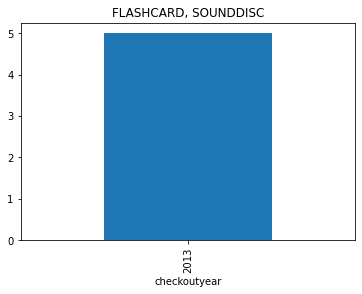

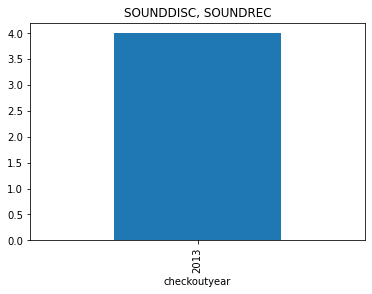

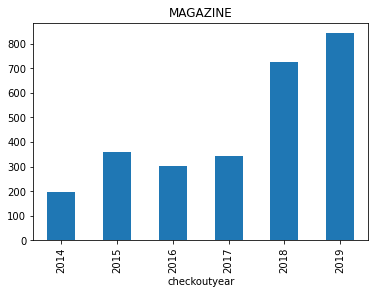

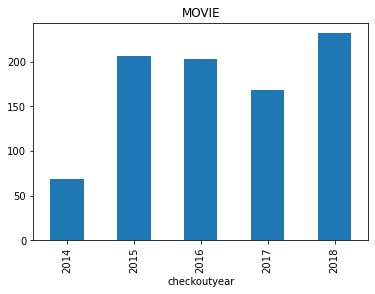

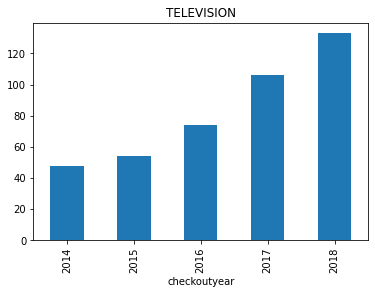

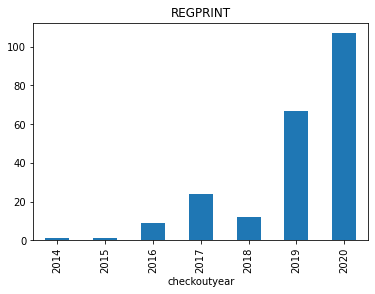

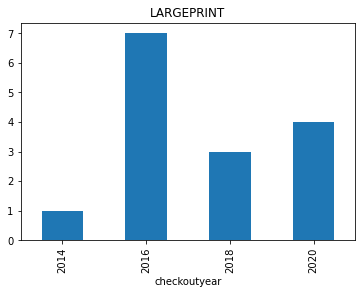

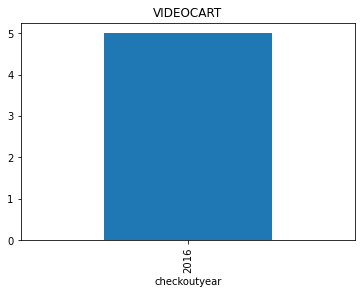

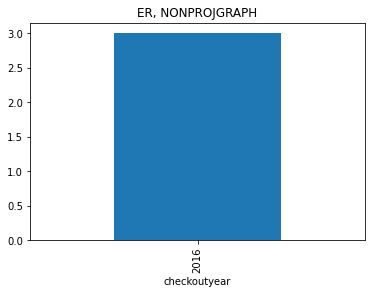

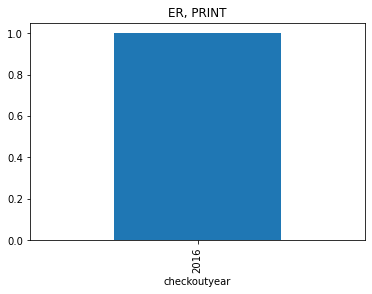

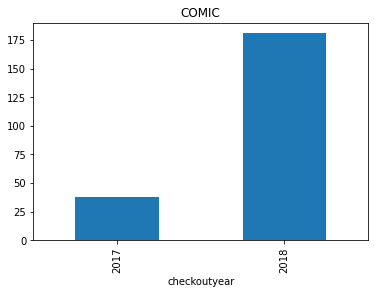

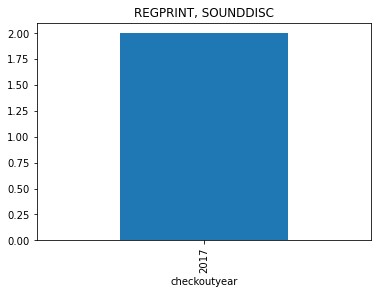

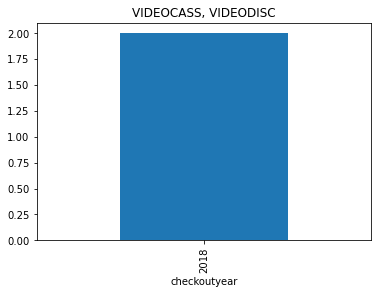

In [7]:
%matplotlib inline

# ermittle alle materialtypen
materialtype_list = checkouts_df["materialtype"].unique()

# gehe in schleife durch alle materialtypen
for materialtype in materialtype_list:
    # filtere aus Dataframe nur den aktuellen materialtyp und mach die selbe Magie wie oben
    checkouts_materialtype_df = checkouts_df[checkouts_df["materialtype"] == materialtype]
    checkouts_materialtype_final_df = checkouts_materialtype_df.groupby(by="checkoutyear").sum()
    checkouts_materialtype_final_df["checkouts"].plot(kind="bar")
    
    # zeige sofort den Plot inklusive Titel
    plt.title(materialtype)
    plt.show()